In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os 
import netCDF4 as nc
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1) Data Visualization

### Import trade and price data

In [23]:
productionData = pd.read_csv("./tradeData.csv") 

importData = pd.read_csv("./importPriceData.csv") 
importData

,Unnamed: 0,area,item,year,import_value,import_quantity,price
0,0,Afghanistan,Maize (corn),1961,NaN,NaN,NaN
1,1,Afghanistan,Maize (corn),1962,NaN,NaN,NaN
2,2,Afghanistan,Maize (corn),1963,NaN,NaN,NaN
3,3,Afghanistan,Maize (corn),1964,NaN,NaN,NaN
4,4,Afghanistan,Maize (corn),1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31114,31114,Zimbabwe,Wheat,2016,97892.0,268891.0,0.364058
31115,31115,Zimbabwe,Wheat,2017,76466.0,205760.0,0.371627
31116,31116,Zimbabwe,Wheat,2018,108068.0,276776.0,0.390453
31117,31117,Zimbabwe,Wheat,2019,51617.0,124632.0,0.414155


# 2) Getting the data in and organized

In [15]:
print("How many years we have: ", len(np.unique(importData['year'])))
print("How many countries we have: ", len(np.unique(importData['area'])))
print("Our columns are : ")
for col in importData.columns:
    print(col)

How many years we have:  60
How many countries we have:  203
Our columns are : 
Unnamed: 0
area
item
year
import_value
import_quantity
price


# 3) Price

### Import Price Visualization

       Unnamed: 0               area          item  year  import_value  \
9248         9248              Egypt  Maize (corn)  1961        6100.0   
9249         9249              Egypt  Maize (corn)  1962       13820.0   
9250         9250              Egypt  Maize (corn)  1963       10640.0   
9251         9251              Egypt  Maize (corn)  1964       28230.0   
9252         9252              Egypt  Maize (corn)  1965        9630.0   
...           ...                ...           ...   ...           ...   
23029       23029  Republic of Korea  Maize (corn)  2016     1898337.0   
23030       23030  Republic of Korea  Maize (corn)  2017     1788710.0   
23031       23031  Republic of Korea  Maize (corn)  2018     2132566.0   
23032       23032  Republic of Korea  Maize (corn)  2019     2352948.0   
23033       23033  Republic of Korea  Maize (corn)  2020     2370922.0   

       import_quantity     price  
9248          101300.0  0.060217  
9249          264400.0  0.052269  
9250  

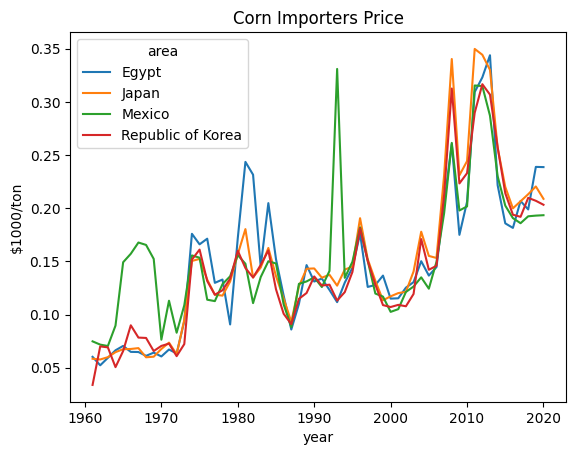

In [17]:
items = {
    'Corn': "Maize (corn)",
    # 'Soy': "Soya beans",
    # 'Wheat': "Wheat",
}

# importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
# exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

topCornImports = importData[(importData['area'] == "Japan") | (importData['area'] == "Mexico") | (importData['area'] == "Republic of Korea") | (importData['area'] == "Egypt")]


# fig, axes = plt.subplots(nrows=3, ncols=1)
# fig.set_figheight(15)

for i, crop in enumerate(items):
    tradeItem = items[crop]

    itemImports = topCornImports[(topCornImports["item"] == tradeItem)]
    print(itemImports)

    itemImports.groupby(['year', 'area'])['price'].mean().unstack().plot(title="Corn Importers Price", ylabel="$1000/ton")

    # allImport = itemImports.groupby(['area', 'year'])['price']
    # print(allImport)
    # allImport.plot(legend=True, title=crop + " Import Prices")

    # allExport = itemExports.groupby(['year'])['value'].agg('sum')
    # allExport.plot(ax=axes[i], title="Global " + crop + " Imports and Exports", legend=True, label="exports")

# 4) Predicting Price

In [20]:
# importPriceData = importData[importData["item"] == "Maize (corn)"]
# display(importPriceData)

,Unnamed: 0,area,item,year,import_value,import_quantity,price
0,0,Afghanistan,Maize (corn),1961,NaN,NaN,NaN
1,1,Afghanistan,Maize (corn),1962,NaN,NaN,NaN
2,2,Afghanistan,Maize (corn),1963,NaN,NaN,NaN
3,3,Afghanistan,Maize (corn),1964,NaN,NaN,NaN
4,4,Afghanistan,Maize (corn),1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...
30994,30994,Zimbabwe,Maize (corn),2016,296686.0,821672.0,0.361076
30995,30995,Zimbabwe,Maize (corn),2017,116737.0,308267.0,0.378688
30996,30996,Zimbabwe,Maize (corn),2018,46356.0,92847.0,0.499273
30997,30997,Zimbabwe,Maize (corn),2019,30881.0,73601.0,0.419573


In [40]:
items = {
    'Corn': "Maize (corn)",
    'Soy': "Soya beans",
    'Wheat': "Wheat",
}

exportQuantityData = productionData[(productionData["element"] == "Export Quantity")]

for i, crop in enumerate(items):
    tradeItem = items[crop]

    importItemData = importData[(importData["item"] == tradeItem)]
    annualPrice = importItemData.groupby(['year'])['price'].agg('sum').to_frame()
    annualPrice.reset_index(inplace=True)
    annualPrice = annualPrice.rename(columns = {'index':'year'})

    itemExports = exportQuantityData[(exportQuantityData["item"] == tradeItem)]
    allExport = itemExports.groupby(['year'])['value'].agg('sum').to_frame()
    allExport.reset_index(inplace=True)
    allExport = allExport.rename(columns = {'index':'year'})

    completeData = annualPrice.merge(allExport, right_on='year', left_on='year')
    # display(completeData)

    print("Regresssion for ")
    print(crop)
    print("==========") 
    lm = smf.ols('price ~ value + year', data = completeData, missing='drop').fit()
    print(lm.summary())
   
    



Regresssion for 
Corn
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           2.50e-24
Time:                        14:44:26   Log-Likelihood:                -251.15
No. Observations:                  60   AIC:                             508.3
Df Residuals:                      57   BIC:                             514.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3642.5983    677.0